# Лингвистический центр

In [119]:
# импортируем библиотеки 
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df=pd.read_excel("C:\\Users\\Sergey\\Downloads\\Тестовое\\BI-тестовое задание.xlsx")
df.head()

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма
0,S_167,2022-01-31,14311.883410,NaN,К1,3494.390134,2022-03-01,2022-03-11,Оплачена,2022-03-01,0
1,S_521,2022-03-10,5027.354260,NaN,К1,2613.901345,2022-04-01,2022-04-22,Оплачена,2022-04-01,0
2,VL112,2022-03-23,470.852017,NaN,К2,226.726457,2022-03-23,2022-03-23,Оплачена,NaT,0
3,S_218,2023-02-03,158.116591,NaN,К3,12.376681,2023-02-08,2023-02-10,Оплачена,2023-02-08,0
4,S_-31,2022-06-10,5064.538116,NaN,К4,665.040358,2022-06-27,2022-06-29,Оплачена,2022-06-27,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               83957 non-null  object        
 1   Дата продажи        83958 non-null  datetime64[ns]
 2   Сумма               83958 non-null  float64       
 3   Проданный заказ     2893 non-null   object        
 4   Клиент              83958 non-null  object        
 5   Сумма исполнителю   82820 non-null  float64       
 6   Дата выручки        82590 non-null  datetime64[ns]
 7   Дата оплаты         81315 non-null  datetime64[ns]
 8   Статус счета        83958 non-null  object        
 9   Дата акта           51322 non-null  datetime64[ns]
 10  Неоплаченная сумма  83958 non-null  object        
dtypes: datetime64[ns](4), float64(2), object(5)
memory usage: 7.0+ MB


Описание данных

Заказ - уникальный код заказа клиента, стостоит из: код клиента + порядковый номер заказа этого клиента

Дата продажи - дата согласования заказа клиентом, появляется в момент переставление заказа в статус подтвержден

Сумма - сумма для клиента

Проданный заказ false - при переставлении заказа в отменен = false

Проданный заказ true - при переставлении заказа в подтвержден = true

Клиент - уникальный код  клиента

Сумма исполнителю - сумма для выплаты исполнителям

Дата выручки - Дата оплаты заказа клиентом, появляется только при условии, что заказ завершен и сдан клиенту

Дата оплаты - Дата оплаты заказа клиентом

Статус счета Нет спецификации - счет еще не выставлен клиенту

Статус счета Не оплачена - счет выставлен, но не оплачен клиентом

Статус счета Частично оплачена - клиентом оплачена не вся сумма

Статус счета Оплачена - счет полностью оплачен

Статус счета Просрочена - дата оплаты по договору наступила, но счет еще не оплачен

Статус счета Списание - клиент отказывается оплачивать счет/не выходит на связь, оплаты нет и не предвидится

Статус счета reinvoiced - клиент попросил внести правки и перевыставить счет, оплаты нет

Дата акта - дата выставления акта для клиента

Неоплаченная сумма - неоплаченная клиентом сумма ( при недоплате принимает положительное значение, при переплате - отрицательное)

In [122]:
#Посчитаем количество пустых значений.
df.isna().sum()

Заказ                     1
Дата продажи              0
Сумма                     0
Проданный заказ       81065
Клиент                    0
Сумма исполнителю      1138
Дата выручки           1368
Дата оплаты            2643
Статус счета              0
Дата акта             32636
Неоплаченная сумма        0
dtype: int64

In [123]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = ((report['missing_values'] / df.shape[0])*100).round(3)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Проданный заказ,81065,96.554
Дата акта,32636,38.872
Дата оплаты,2643,3.148
Дата выручки,1368,1.629
Сумма исполнителю,1138,1.355
Заказ,1,0.001
Дата продажи,0,0.000
Сумма,0,0.000
Клиент,0,0.000
Статус счета,0,0.000


Проблемы в данных:
    1. "Неоплаченная сумма" перевести во FLOAT
    2. Пропуски в данных Заказ, Проданный заказ, Сумма исполнителю, Дата выручки, Дата оплаты, Дата акта
    Что со всем этим делать, буду решать дальше.

# Предобоработка данных


In [124]:
#Посмотрим уникальные значения
df['Дата оплаты'].unique()

array(['2022-03-11T00:00:00.000000000', '2022-04-22T00:00:00.000000000',
       '2022-03-23T00:00:00.000000000', '2023-02-10T00:00:00.000000000',
       '2022-06-29T00:00:00.000000000', '2023-02-08T00:00:00.000000000',
       '2023-04-19T00:00:00.000000000', '2022-06-15T00:00:00.000000000',
       '2023-06-19T00:00:00.000000000', '2023-12-22T00:00:00.000000000',
       '2023-06-20T00:00:00.000000000', '2022-09-26T00:00:00.000000000',
       '2023-12-25T00:00:00.000000000', '2022-11-09T00:00:00.000000000',
       '2022-03-05T00:00:00.000000000', '2022-04-19T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2023-12-06T00:00:00.000000000',
       '2023-08-16T00:00:00.000000000', '2022-05-13T00:00:00.000000000',
       '2023-01-26T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-06-20T00:00:00.000000000', '2022-10-21T00:00:00.000000000',
       '2022-09-19T00:00:00.000000000', '2023-03-28T00:00:00.000000000',
       '2022-09-20T00:00:00.000000000', '2023-03-16

In [125]:
#Посмотрим уникальные значения
df['Неоплаченная сумма'].unique()

array([0, 2440.547085, -0.421524, ..., 16330.78924, 3125.923766,
       3558.887892], dtype=object)

In [126]:
#Изменим тип данных
z=['3,1E-5', '4,9E-5', '1,7E-5', '2,6E-5', '6,2E-5', '3,5E-5', '1,6E-5', '9,3E-5', '1,3E-5', '4,2E-5', '9,8E-5', '4,8E-5', 
   '4,4E-5', '5,3E-5', '5,2E-5', '3,4E-5']
z1=['0.000031', '0.000049', '0.000017', '0.000026', '0.000062', '0.000035', '0.000016', '0.000093', '0.000013', '0.000042',
   '0.000098', '0.000048', '0.000044', '0.000053', '0.000052', '0.000034']
df['Неоплаченная сумма']=df['Неоплаченная сумма'].replace(z, z1)
df['Неоплаченная сумма']=df['Неоплаченная сумма'].astype(float).round(2)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               83957 non-null  object        
 1   Дата продажи        83958 non-null  datetime64[ns]
 2   Сумма               83958 non-null  float64       
 3   Проданный заказ     2893 non-null   object        
 4   Клиент              83958 non-null  object        
 5   Сумма исполнителю   82820 non-null  float64       
 6   Дата выручки        82590 non-null  datetime64[ns]
 7   Дата оплаты         81315 non-null  datetime64[ns]
 8   Статус счета        83958 non-null  object        
 9   Дата акта           51322 non-null  datetime64[ns]
 10  Неоплаченная сумма  83958 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 7.0+ MB


In [128]:
share_0_age = ((df['Заказ'].isna().sum() / 83958) * 100).round(3)
print("Доля пропусков в Заказ:", share_0_age,"% от всех данных")

Доля пропусков в Заказ: 0.001 % от всех данных


In [129]:
share_0_age = ((df['Проданный заказ'].isna().sum() / 83958) * 100).round(2)
print("Доля пропусков в Проданный заказ:", share_0_age,"% от всех данных")

Доля пропусков в Проданный заказ: 96.55 % от всех данных


In [130]:
share_0_age = ((df['Сумма исполнителю'].isna().sum() / 83958) * 100).round(2)
print("Доля пропусков в Сумма исполнителю:", share_0_age,"% от всех данных")

Доля пропусков в Сумма исполнителю: 1.36 % от всех данных


In [131]:
share_0_age = ((df['Дата выручки'].isna().sum() / 83958) * 100).round(2)
print("Доля пропусков в Дата выручки:", share_0_age,"% от всех данных")

Доля пропусков в Дата выручки: 1.63 % от всех данных


In [132]:
share_0_age = ((df['Дата оплаты'].isna().sum() / 83958) * 100).round(2)
print("Доля пропусков в Дата оплаты:", share_0_age,"% от всех данных")

Доля пропусков в Дата оплаты: 3.15 % от всех данных


In [133]:
share_0_age = ((df['Дата акта'].isna().sum() / 83958) * 100).round(2)
print("Доля пропусков в Дата акта:", share_0_age,"% от всех данных")

Доля пропусков в Дата акта: 38.87 % от всех данных


In [134]:
df = df.dropna(subset=['Дата оплаты', 'Дата выручки', 'Сумма исполнителю', 'Заказ'])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80303 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               80303 non-null  object        
 1   Дата продажи        80303 non-null  datetime64[ns]
 2   Сумма               80303 non-null  float64       
 3   Проданный заказ     2431 non-null   object        
 4   Клиент              80303 non-null  object        
 5   Сумма исполнителю   80303 non-null  float64       
 6   Дата выручки        80303 non-null  datetime64[ns]
 7   Дата оплаты         80303 non-null  datetime64[ns]
 8   Статус счета        80303 non-null  object        
 9   Дата акта           50280 non-null  datetime64[ns]
 10  Неоплаченная сумма  80303 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 7.4+ MB


In [136]:
#Выведем сводную таблицу с пропусками в Проданный заказ
df[df['Дата акта'].isnull()].describe()

,Сумма,Сумма исполнителю,Неоплаченная сумма
count,30023.000000,30023.000000,30023.000000
mean,3701.091294,1215.817488,-42.904411
std,7984.544905,3767.111636,2250.968420
min,0.000000,0.000000,-189267.600000
25%,682.867712,199.551569,0.000000
50%,1255.605380,326.959641,0.000000
75%,3139.013452,855.246636,0.000000
max,99661.681610,116267.905800,46368.430000


In [137]:
#Выведем сводную таблицу без пропусков в Дата акта
df1 = df.loc[df['Дата акта'].isna()==False]
df1.describe()

,Сумма,Сумма исполнителю,Неоплаченная сумма
count,50280.000000,50280.000000,50280.000000
mean,6854.287768,1836.297791,15.226512
std,12419.498646,4095.604562,820.098869
min,0.695067,0.000000,-88994.800000
25%,785.128923,178.056054,0.000000
50%,2295.414797,530.623318,0.000000
75%,6892.838565,1672.254484,0.000000
max,99808.282510,181044.609900,72914.320000


Удаление пропусков в "Дата акта" сильно влияет на показатели среднего и среднемедианного

In [138]:
#Выведем сводную таблицу с пропусками в Проданный заказ
df[df['Проданный заказ'].isnull()].describe()


,Сумма,Сумма исполнителю,Неоплаченная сумма
count,77872.000000,77872.000000,77872.000000
mean,5637.273227,1597.133339,-5.636033
std,11022.901724,3940.729118,1476.918224
min,0.000000,0.000000,-189267.600000
25%,733.183855,196.860984,0.000000
50%,1748.878923,425.336322,0.000000
75%,5201.793720,1317.487667,0.000000
max,99808.282510,124098.668200,72914.320000


In [139]:
#Выведем сводную таблицу без пропусков в Проданный заказ
df.loc[df['Проданный заказ'].isna()==False].describe()

,Сумма,Сумма исполнителю,Неоплаченная сумма
count,2431.000000,2431.000000,2431.000000
mean,6896.631910,1834.460715,-34.405981
std,12680.338856,5260.445350,2576.845767
min,17.264573,0.000000,-120915.980000
25%,759.069506,159.443945,0.000000
50%,2178.080717,511.825112,0.000000
75%,6724.466366,1588.522421,0.000000
max,96370.170400,181044.609900,24421.210000


Удаление пропусков в "Проданный заказ" сильно влияет на показатели среднего и среднемедианного


In [140]:
df['Проданный заказ'] = df['Проданный заказ']. fillna (df['Статус счета'])
z=['Оплачена', 'да', 'Частично оплачена', 'Не оплачена', 'Нет спецификации', 'Просрочена', 'Списание']
z1=['да', 'да','нет', 'нет','нет','нет','нет']
df['Проданный заказ']=df['Проданный заказ'].replace(z, z1)
df['Проданный заказ'].unique()

array(['да', True, 'нет'], dtype=object)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80303 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               80303 non-null  object        
 1   Дата продажи        80303 non-null  datetime64[ns]
 2   Сумма               80303 non-null  float64       
 3   Проданный заказ     80303 non-null  object        
 4   Клиент              80303 non-null  object        
 5   Сумма исполнителю   80303 non-null  float64       
 6   Дата выручки        80303 non-null  datetime64[ns]
 7   Дата оплаты         80303 non-null  datetime64[ns]
 8   Статус счета        80303 non-null  object        
 9   Дата акта           50280 non-null  datetime64[ns]
 10  Неоплаченная сумма  80303 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 7.4+ MB


In [142]:
#с датой акта ничего не понятно, поставлю заглушку
df['Дата акта'] = df['Дата акта']. fillna (0)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80303 entries, 0 to 83957
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Заказ               80303 non-null  object        
 1   Дата продажи        80303 non-null  datetime64[ns]
 2   Сумма               80303 non-null  float64       
 3   Проданный заказ     80303 non-null  object        
 4   Клиент              80303 non-null  object        
 5   Сумма исполнителю   80303 non-null  float64       
 6   Дата выручки        80303 non-null  datetime64[ns]
 7   Дата оплаты         80303 non-null  datetime64[ns]
 8   Статус счета        80303 non-null  object        
 9   Дата акта           80303 non-null  object        
 10  Неоплаченная сумма  80303 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(5)
memory usage: 7.4+ MB


In [144]:
df

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма
0,S_167,2022-01-31,14311.883410,да,К1,3494.390134,2022-03-01,2022-03-11,Оплачена,2022-03-01 00:00:00,0.0
1,S_521,2022-03-10,5027.354260,да,К1,2613.901345,2022-04-01,2022-04-22,Оплачена,2022-04-01 00:00:00,0.0
2,VL112,2022-03-23,470.852017,да,К2,226.726457,2022-03-23,2022-03-23,Оплачена,0,0.0
3,S_218,2023-02-03,158.116591,да,К3,12.376681,2023-02-08,2023-02-10,Оплачена,2023-02-08 00:00:00,0.0
4,S_-31,2022-06-10,5064.538116,да,К4,665.040358,2022-06-27,2022-06-29,Оплачена,2022-06-27 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83953,S_079,2023-02-02,1043.923766,да,К22,255.000000,2023-02-20,2023-05-25,Оплачена,2023-02-20 00:00:00,0.0
83954,S_863,2023-02-22,1505.363228,да,К96,609.291479,2023-04-03,2023-07-05,Оплачена,2023-04-03 00:00:00,0.0
83955,C_-26,2023-03-27,87721.367710,да,К209,26810.672650,2023-03-31,2023-04-19,Оплачена,2023-03-31 00:00:00,0.0
83956,D_312,2023-08-03,1439.461883,да,К15,230.744394,2023-08-03,2023-08-03,Оплачена,0,0.0


# Проверка аномалий

In [145]:
df.describe()

,Сумма,Сумма исполнителю,Неоплаченная сумма
count,80303.000000,80303.000000,80303.000000
mean,5675.397593,1604.317913,-6.506981
std,11078.729721,3987.262310,1521.910868
min,0.000000,0.000000,-189267.600000
25%,734.320627,195.479821,0.000000
50%,1757.847532,426.834080,0.000000
75%,5254.762331,1327.002242,0.000000
max,99808.282510,181044.609900,72914.320000


Есть нулевые значения в графах сумма и сумма исполнителю, будем дальше смотреть что с ними делать

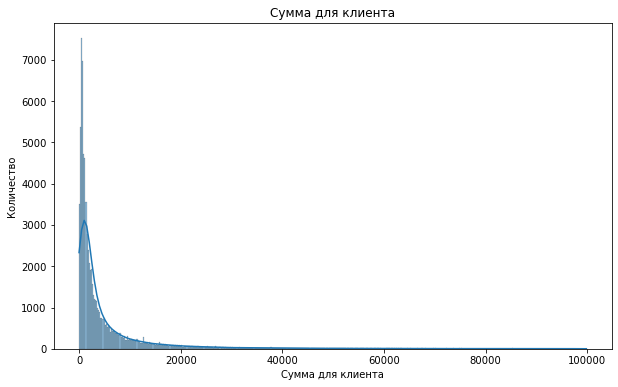

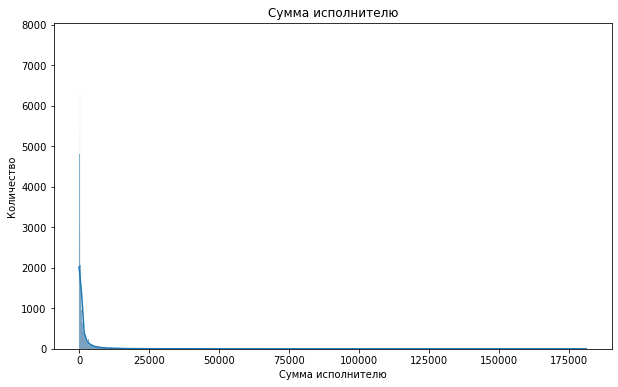

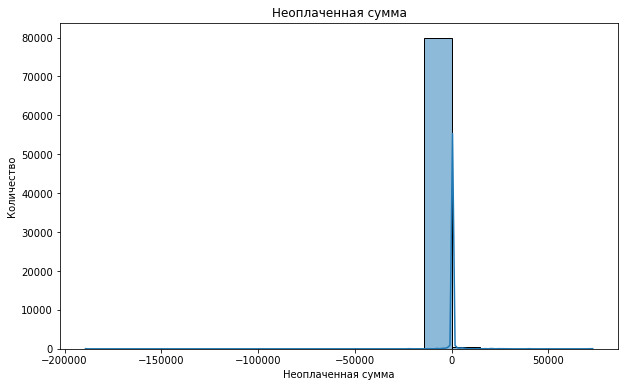

In [146]:
#выделим не категорийные значения

columns = ['Сумма', 'Сумма исполнителю', 'Неоплаченная сумма']
column_name = {'Сумма': 'Сумма для клиента', 'Сумма исполнителю': 'Сумма исполнителю', 'Неоплаченная сумма': 'Неоплаченная сумма'}

warnings.filterwarnings("ignore")
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.title(column_name[column])
    sns.histplot(data=df, x=column, kde=True)  
    plt.xlabel(column_name[column])  
    plt.ylabel('Количество')
    plt.show()

Сумма для клиентов не может быть нулевой - это анамалия

Сумма исполнителю, Неоплаченная сумма может быть нулевой и Неоплаченная сумма может быть отрицательной

In [147]:
# фильтрация
df_filter=df[df['Сумма']>0]
df_filter.describe()

,Сумма,Сумма исполнителю,Неоплаченная сумма
count,80292.000000,80292.000000,80292.000000
mean,5676.175122,1604.503426,-6.447438
std,11079.289423,3987.503402,1521.999427
min,0.695067,0.000000,-189267.600000
25%,734.808295,195.515694,0.000000
50%,1757.847533,426.905829,0.000000
75%,5256.866591,1327.193945,0.000000
max,99808.282510,181044.609900,72914.320000


# Анализ данных

## Анализ клиентов

In [148]:
# Проверим как зависит сумма от даты продажи, сравним два последних года

In [149]:
df_filter['Год продажи']=df_filter['Дата продажи']
df_filter.loc[:, 'Год продажи'] = df_filter.loc[:, 'Год продажи'].dt.year

In [150]:
df_filter

,Заказ,Дата продажи,Сумма,Проданный заказ,Клиент,Сумма исполнителю,Дата выручки,Дата оплаты,Статус счета,Дата акта,Неоплаченная сумма,Год продажи
0,S_167,2022-01-31,14311.883410,да,К1,3494.390134,2022-03-01,2022-03-11,Оплачена,2022-03-01 00:00:00,0.0,2022
1,S_521,2022-03-10,5027.354260,да,К1,2613.901345,2022-04-01,2022-04-22,Оплачена,2022-04-01 00:00:00,0.0,2022
2,VL112,2022-03-23,470.852017,да,К2,226.726457,2022-03-23,2022-03-23,Оплачена,0,0.0,2022
3,S_218,2023-02-03,158.116591,да,К3,12.376681,2023-02-08,2023-02-10,Оплачена,2023-02-08 00:00:00,0.0,2023
4,S_-31,2022-06-10,5064.538116,да,К4,665.040358,2022-06-27,2022-06-29,Оплачена,2022-06-27 00:00:00,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
83953,S_079,2023-02-02,1043.923766,да,К22,255.000000,2023-02-20,2023-05-25,Оплачена,2023-02-20 00:00:00,0.0,2023
83954,S_863,2023-02-22,1505.363228,да,К96,609.291479,2023-04-03,2023-07-05,Оплачена,2023-04-03 00:00:00,0.0,2023
83955,C_-26,2023-03-27,87721.367710,да,К209,26810.672650,2023-03-31,2023-04-19,Оплачена,2023-03-31 00:00:00,0.0,2023
83956,D_312,2023-08-03,1439.461883,да,К15,230.744394,2023-08-03,2023-08-03,Оплачена,0,0.0,2023


Text(0.5, 1.0, 'Продажи по годам')

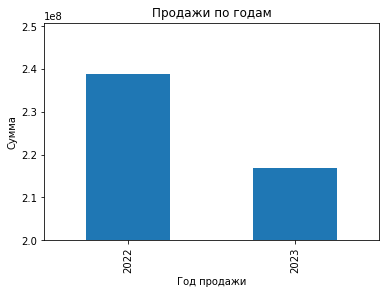

In [151]:
df_filter['Сумма'].groupby(df_filter['Год продажи']).sum().plot(kind='bar')
plt.ylim(200000000, )
plt.ylabel('Сумма')  
plt.title('Продажи по годам')


In [152]:
df_2022=df_filter['Сумма'][df_filter['Год продажи']<2023].sum()


In [153]:
df_2023=df_filter['Сумма'][df_filter['Год продажи']>2022].sum()


In [154]:
print('Изменение суммы продаж соcтавило:', (df_2023-df_2022).round(2))

Изменение суммы продаж соcтавило: -21921764.43


Видно падение продаж в 2023 году.

In [155]:
# Проверим как менялась сумма от даты продажи каждого пользователя, сравним два последних года

Text(0.5, 1.0, 'Продажи за 2022 год')

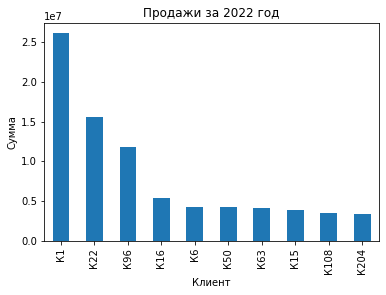

In [156]:
df_2022=df_filter[df_filter['Год продажи'] == 2022].groupby([df_filter['Клиент']])['Сумма'].sum().sort_values( ascending=False)
df_2022.head(10).plot(kind='bar')
plt.ylabel('Сумма') 
plt.title('Продажи за 2022 год')

Text(0.5, 1.0, 'Продажи за 2023 год')

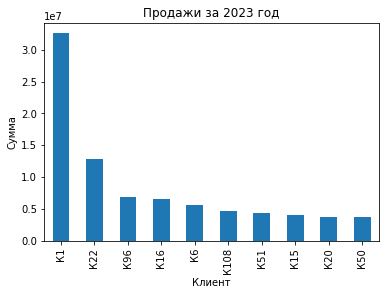

In [157]:
df_2023=df_filter[df_filter['Год продажи'] == 2023].groupby([df_filter['Клиент']])['Сумма'].sum().sort_values( ascending=False)
df_2023.head(10).plot(kind='bar')
plt.ylabel('Сумма')  
plt.title('Продажи за 2023 год')


В первой пятерке клиентов по продажам изменеий не наблюдается

In [158]:
# Посчитаем колличество родаж за год по клиентам


In [159]:
df_2022=df_filter['Сумма'][df_filter['Год продажи']<2023].count()
print('Количество продаж в 2022 году', df_2022)

Количество продаж в 2022 году 43752


In [160]:
df_2023=df_filter['Сумма'][df_filter['Год продажи']>2022].count()
print('Количество продаж в 2023 году', df_2023)

Количество продаж в 2023 году 36540


Text(0.5, 1.0, 'Количество продаж по годам')

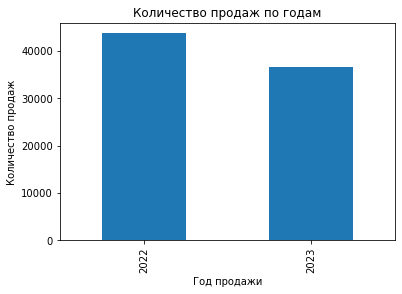

In [161]:
df_filter['Сумма'].groupby(df_filter['Год продажи']).count().plot(kind='bar')
plt.ylabel('Количество продаж')  
plt.title('Количество продаж по годам')

In [162]:
print('Изменение количества продаж соcтавило:', (df_2023-df_2022))

Изменение количества продаж соcтавило: -7212


Видно падение количества продаж в 2023 году

Text(0.5, 1.0, 'Количество продаж в 2022 году')

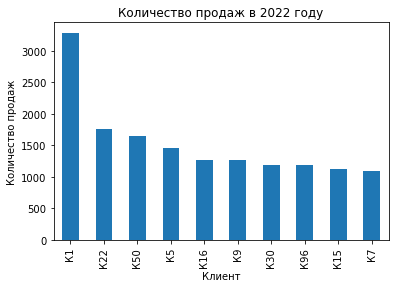

In [163]:
df_2022=df_filter[df_filter['Год продажи'] == 2022].groupby([df_filter['Клиент']])['Сумма'].count().sort_values( ascending=False)
df_2022.head(10).plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2022 году')

Text(0.5, 1.0, 'Количество продаж в 2023 году')

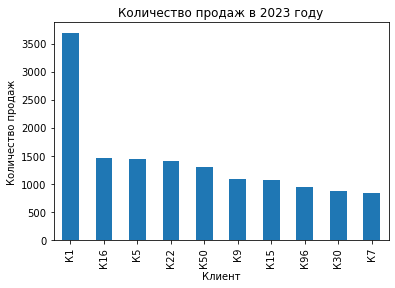

In [164]:
df_2023=df_filter[df_filter['Год продажи'] == 2023].groupby([df_filter['Клиент']])['Сумма'].count().sort_values( ascending=False)
df_2023.head(10).plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2023 году')

В первой десятке изменений не наблюдается

Промежуточный вывод:
    Наблюдается падение продаж услуг за 2023 год (-7212 штук) и, как следствие, падение выручки (-21921764.43 у.е.). По клиентам в в первой пятерке как по количеству услуг, так и по стоимости изменеий не наблюдается.

In [165]:
## Зависимость не оплаты по годам

def неоплаченная_сумма(x):
    if x < 0:
        return 'Неоплата'
    elif x > 0:
        return 'Переплата'
    else:
        return '0'

df_filter['Статус оплаты'] = df['Неоплаченная сумма'].apply(неоплаченная_сумма)
df_filter.groupby('Статус оплаты')['Неоплаченная сумма'].count()


Статус оплаты
0            76909
Неоплата      2705
Переплата      678
Name: Неоплаченная сумма, dtype: int64

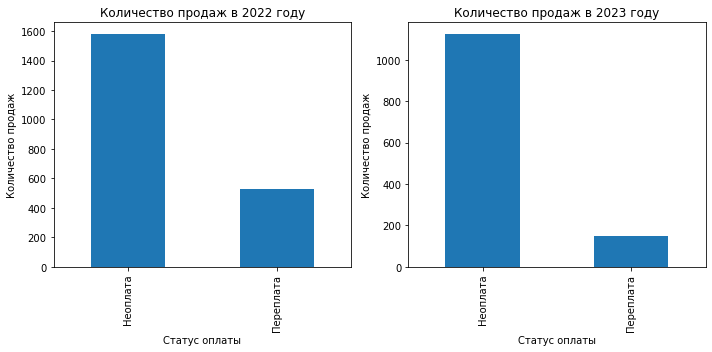

In [166]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].count()
df_2022 = df_2022.sort_values(ascending=False)

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].count()
df_2023 = df_2023.sort_values(ascending=False)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df_2022.plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2022 году')

plt.subplot(1, 2, 2)
df_2023.plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2023 году')


plt.tight_layout()

plt.show()

In [167]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022[df_2022['Статус оплаты'] != "Переплата"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].count()

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023[df_2023['Статус оплаты'] != "Переплата"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].count()

print('Изменение количества продаж с не оплатой соcтавило:', abs(df_2023-df_2022))

Изменение количества продаж с не оплатой соcтавило: Статус оплаты
Неоплата    455
Name: Сумма, dtype: int64


In [168]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022[df_2022['Статус оплаты'] != "Неоплата"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].count()

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023[df_2023['Статус оплаты'] != "Неоплата"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].count()

print('Изменение количества продаж с переплатой соcтавило:', abs(df_2023-df_2022))

Изменение количества продаж с переплатой соcтавило: Статус оплаты
Переплата    376
Name: Сумма, dtype: int64


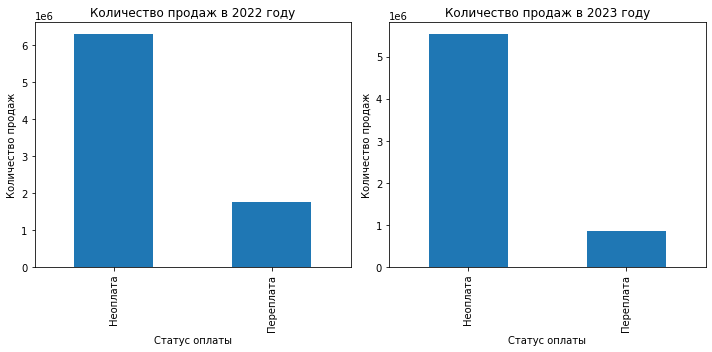

In [169]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].sum()
df_2022 = df_2022.sort_values(ascending=False)

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].sum()
df_2023 = df_2023.sort_values(ascending=False)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df_2022.plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2022 году')

plt.subplot(1, 2, 2)
df_2023.plot(kind='bar')
plt.ylabel('Количество продаж') 
plt.title('Количество продаж в 2023 году')


plt.tight_layout()

plt.show()

In [170]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022[df_2022['Статус оплаты'] != "Переплата"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].sum()

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023[df_2023['Статус оплаты'] != "Переплата"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].sum()

print('Изменение суммы не оплаченных продаж соcтавило:', abs(df_2023-df_2022))

Изменение суммы не оплаченных продаж соcтавило: Статус оплаты
Неоплата    753757.533503
Name: Сумма, dtype: float64


In [171]:
df_2022 = df_filter[df_filter['Год продажи'] == 2022]
df_2022 = df_2022[df_2022['Статус оплаты'] != "0"]
df_2022 = df_2022[df_2022['Статус оплаты'] != "Неоплата"]
df_2022 = df_2022.groupby([df_2022['Статус оплаты']])['Сумма'].sum()

df_2023 = df_filter[df_filter['Год продажи'] == 2023]
df_2023 = df_2023[df_2023['Статус оплаты'] != "0"]
df_2023 = df_2023[df_2023['Статус оплаты'] != "Неоплата"]
df_2023 = df_2023.groupby([df_2023['Статус оплаты']])['Сумма'].sum()

print('Изменение суммы продаж с переплатой соcтавило:', abs(df_2023-df_2022))

Изменение суммы продаж с переплатой соcтавило: Статус оплаты
Переплата    912234.107457
Name: Сумма, dtype: float64


Количество не оплаченных заказов в 2023 году уменьшилось на 455. Сумма не оплаченных заказов в 2023 году уменьшилась на 753757,53.
Переплата в 2023 году также падает по количеству (376) и стоимости (912234.11)

# ВЫВОДЫ
Наблюдается падение продаж услуг за 2023 год (-7212 штук) и, как следствие, падение выручки (-21921764.43 у.е.). По клиентам в в первой пятерке как по количеству услуг, так и по стоимости изменеий не наблюдается.
Количество не оплаченных заказов в 2023 году уменьшилось на 455. Сумма не оплаченных заказов в 2023 году уменьшилась на 753757,53. Переплата в 2023 году также падает по количеству (376) и стоимости (912234.11).

Точка роста - увеличение количества продаж, проведение рекламных и промо компаний.